## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [6]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [7]:
train, test = keras.datasets.cifar10.load_data()

In [8]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [9]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [21]:
def build_mlp(input_shape, output_units=10, num_neurons=[64, 32, 16]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for idx, n in enumerate(num_neurons):
        if idx == 0:
            x = keras.layers.Dense(n, activation="relu", name="hidden_layer%d" % (idx))(input_layer)
        else:
            x = keras.layers.Dense(n, activation="relu", name="hidden_layer%d" % (idx))(x)
            
    output_layer = keras.layers.Dense(output_units, activation="softmax", name="output_layer")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[output_layer])
    
    return model

In [27]:
"""Code Here
設定超參數
"""
LR = 1e-2
EPOCHS = 20
BATCH_SIZE = 256
MOMENTUM = [0.95, 0.97, 0.99]

In [28]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for m in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with MOMENTUM = %.6f" % (m))
    model = build_mlp(input_shape=x_train.shape[1:], num_neurons=[32, 64, 128])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LR, nesterov=True, momentum=m)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-m-%s-nesterov-True" % str(m)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    
for m in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with MOMENTUM = %.6f" % (m))
    model = build_mlp(input_shape=x_train.shape[1:], num_neurons=[32, 64, 128])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LR, nesterov=False, momentum=m)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-m-%s-nesterov-False" % str(m)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with MOMENTUM = 0.950000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer0 (Dense)        (None, 32)                98336     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 64)                2112      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               8320      
_________________________________________________________________
output_layer (Dense)         (None, 10)                1290      
Total params: 110,058
Trainable params: 110,058
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==========================

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 2s 32us/step - loss: 1.9389 - acc: 0.2918 - val_loss: 1.7472 - val_acc: 0.3706
Epoch 2/20
50000/50000 [==============================] - 1s 28us/step - loss: 1.7055 - acc: 0.3894 - val_loss: 1.6573 - val_acc: 0.4105
Epoch 3/20
50000/50000 [==============================] - 1s 29us/step - loss: 1.6126 - acc: 0.4233 - val_loss: 1.6078 - val_acc: 0.4324
Epoch 4/20
50000/50000 [==============================] - 1s 27us/step - loss: 1.5615 - acc: 0.4427 - val_loss: 1.5501 - val_acc: 0.4463
Epoch 5/20
50000/50000 [==============================] - 1s 27us/step - loss: 1.5232 - acc: 0.4560 - val_loss: 1.5478 - val_acc: 0.4428
Epoch 6/20
50000/50000 [==============================] - 1s 28us/step - loss: 1.4965 - acc: 0.4657 - val_loss: 1.5444 - val_acc: 0.4441
Epoch 7/20
50000/50000 [==============================] - 1s 29us/step - loss: 1.4752 - acc: 0.4736 - val_loss: 1.5125 - val_acc

50000/50000 [==============================] - 2s 33us/step - loss: 1.6548 - acc: 0.4054 - val_loss: 1.6375 - val_acc: 0.4167
Epoch 5/20
50000/50000 [==============================] - 2s 33us/step - loss: 1.6067 - acc: 0.4225 - val_loss: 1.5855 - val_acc: 0.4353
Epoch 6/20
50000/50000 [==============================] - 2s 36us/step - loss: 1.5872 - acc: 0.4293 - val_loss: 1.5651 - val_acc: 0.4413
Epoch 7/20
50000/50000 [==============================] - 2s 34us/step - loss: 1.5657 - acc: 0.4377 - val_loss: 1.5514 - val_acc: 0.4379
Epoch 8/20
50000/50000 [==============================] - 2s 36us/step - loss: 1.5433 - acc: 0.4450 - val_loss: 1.5619 - val_acc: 0.4371
Epoch 9/20
50000/50000 [==============================] - 2s 33us/step - loss: 1.5278 - acc: 0.4509 - val_loss: 1.5646 - val_acc: 0.4490
Epoch 10/20
50000/50000 [==============================] - 2s 35us/step - loss: 1.5211 - acc: 0.4538 - val_loss: 1.5231 - val_acc: 0.4492
Epoch 11/20
50000/50000 [==========================

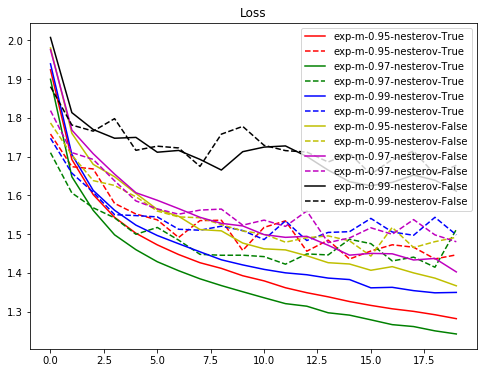

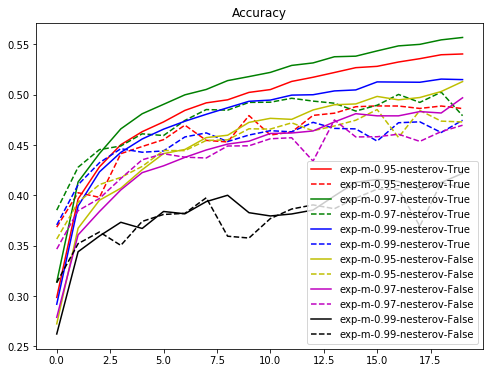

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()